# DATA VISUALIZATION FOR DUMMIES

**The beauty of Jupyter is that you are able to analyze and visualize the data all in one place.**

This lesson will teach you how to create presentation ready graphs with Python.

### **Bar Plot**

A column chart is used to show a **COMPARISON** among different items, or it can show a comparison of items over time. You could use this format to see the revenue per landing page or customers by close date.

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


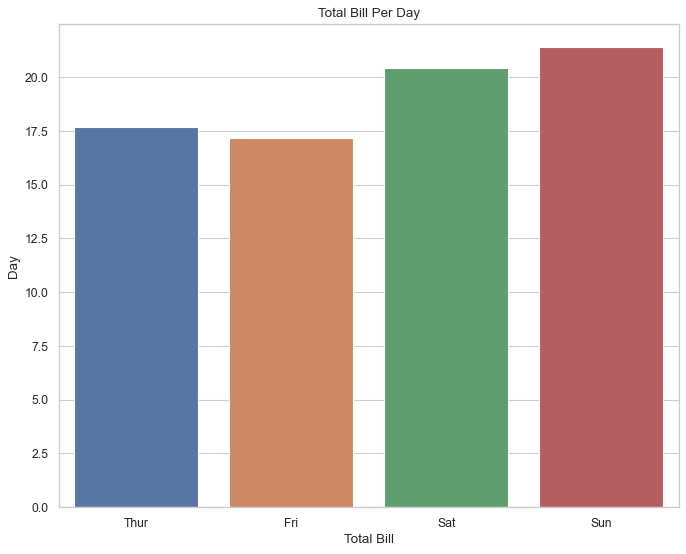

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette = 'deep') # Set multiple parameters in one step
# sns.set_style('whitegrid') # Sets the aesthetic style of the plots
tips = sns.load_dataset("tips") # Used to load the dataset

# Setting the plot size
plt.figure(dpi = 80, figsize=(10,8)) # First number is the width, second number is height

# Loading the dataset
ax = sns.barplot(x="day", y="total_bill", data=tips, ci = None)

# Modify different parts of the plot using Seaborn
ax.set_title('Total Bill Per Day')  # Use set_title to indicate plot title
ax.set(xlabel='Total Bill', ylabel='Day') # Automatic setting of x-axis and y-axis labels

# Modify different parts of the plot using Matplotlib

# plt.title('Total Bill per Day, fontsize = 14) # Use .title to indicate plot title
# plt.xlabel('Total Bill', fontsize = 13) # Use plt.xlabel to manually change x-axis labels 
# plt.ylabel('Day', fontsize = 13, # Use plt.xlabel to manually change x-axis labels
#           rotation = 0, # rotate label to be read horizontally
#           labelpad = 20) # adjust position of label to not intrude the numbers

plt.show()

### **Grouped Bar Plot**

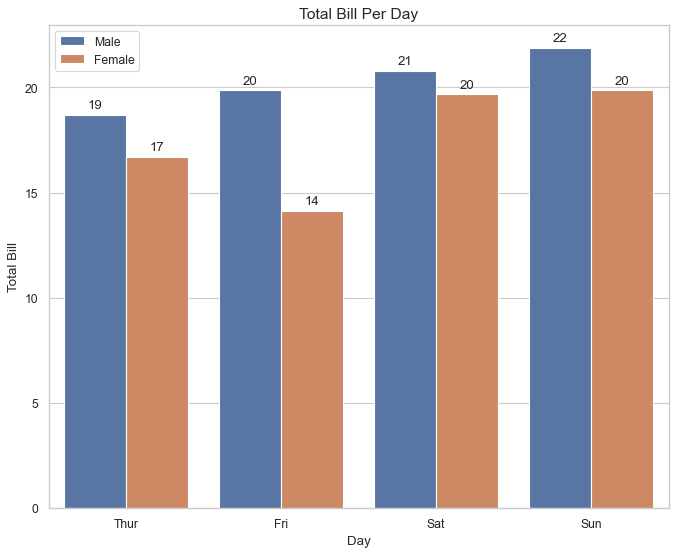

In [8]:
plt.figure(dpi=80,figsize = (10,8))
ax = sns.barplot(x="day", y="total_bill", hue="sex", ci = None, data=tips) # To group bars together, we use the hue argument. 
#Technically, as the name implies, the hue argument tells Seaborn how to color the bars, but in the coloring process, it groups together relevant data.

ax.set_title('Total Bill Per Day', fontsize = 14)  # Use set_title to indicate plot title
ax.set(xlabel='Day', ylabel='Total Bill') # Automatic setting of x-axis and y-axis labels
plt.legend(loc='upper left') # Relocating the legend to a different 

# Setting labels in the barplot

# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height + 0.3, # y-coordinate position of data label, padded 0.3 above bar; Note that the value 0.3 is very important!!!
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center


plt.show()

## **Histogram**

##### Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:

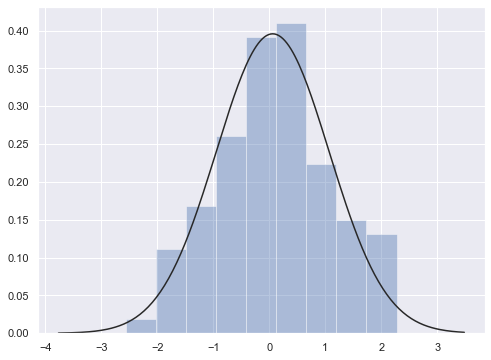

In [9]:
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# #keeping only numeric, not nan values and casting to integer type
# df_age = df[df['age'].notna()]
# df_age = df_age[df_age['age'].str.isnumeric()]
# df_age['age'] = df_age['age'].astype(str).astype(int)

sns.set_theme(); np.random.seed(0)
plt.figure(figsize = (8,6))
x = np.random.randn(100)
ax = sns.distplot(x, fit=norm, kde=False)

In [10]:

# Do quick checks
print("shape:", nba.shape)
nba.head(1)

shape: (550, 30)


,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4


##### To help you understand the mean, median and mode better, let's look at where they are if we visualize the data with a histogram:

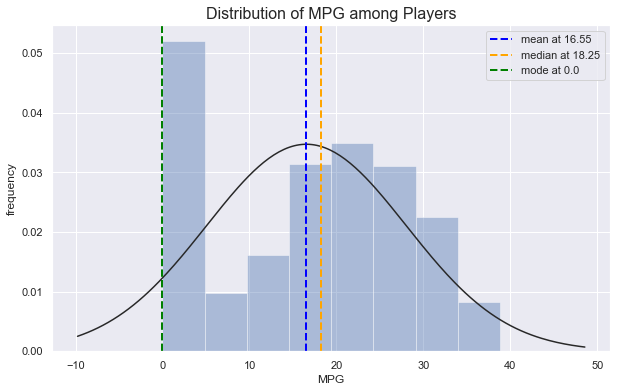

In [11]:
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns 

sns.set_theme(palette = 'deep')
nba = pd.read_csv('NB8_NBA_Players.csv')

# Checking the mean, median, and mode of a dataset

# nba['MPG'].plot(kind='hist', figsize=(10, 6), linewidth=2, color='whitesmoke', edgecolor='gray')

plt.figure(figsize = (10,6))
ax = sns.distplot(nba['MPG'], fit=norm, kde=False)

plt.xlabel("MPG")
plt.ylabel("frequency")
plt.title("Distribution of MPG among Players", fontsize=16)

measurements = [np.around(nba["MPG"].mean(), decimals=2), nba["MPG"].median(), nba["MPG"].mode()[0]]
names = ["mean", "median", 'mode']
colors = ['blue', 'orange', 'green']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2, label='{0} at {1}'.format(name, measurement), c=color)

plt.legend()
plt.show();

##### Real-world data is often skewed. For heavily skewed distributions, it’s better to define the bins in log space

<AxesSubplot:xlabel='distance', ylabel='Count'>

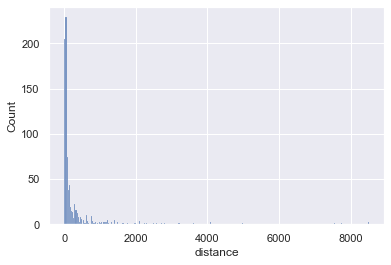

In [12]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")

<AxesSubplot:xlabel='distance', ylabel='Count'>

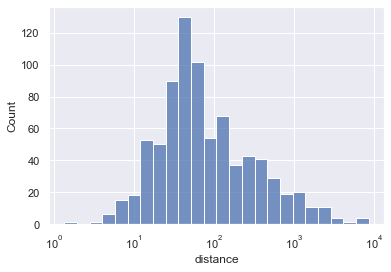

In [16]:
sns.histplot(data=planets, x="distance", log_scale=True)

### **Normality Tests**

![Cheatsheet Guide](https://policyviz.com/wp-content/uploads/2018/08/PolicyViz-DataViz-Cheatsheet_Page_1.png)

![Cheat Sheet 2](https://policyviz.com/wp-content/uploads/2018/08/PolicyViz-DataViz-Cheatsheet_Page_2.png)